<a href="https://colab.research.google.com/github/kaybrian/House_price_prediction_Class_presentation/blob/main/Housing_Price_fastapi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [5]:
# load the data set to see and get some info frm it
data = pd.read_csv('content/house.csv')

In [6]:
# get some head info on the data
data.head()

# get a summary of the data
data.info()

# carry out a more descriptive view of thedata
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251436
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


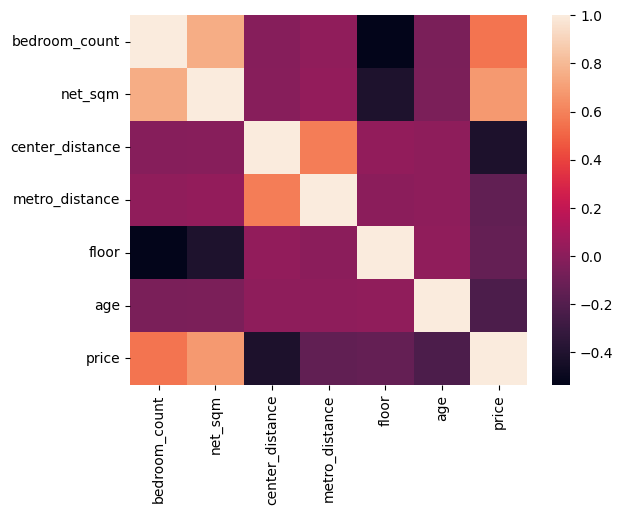

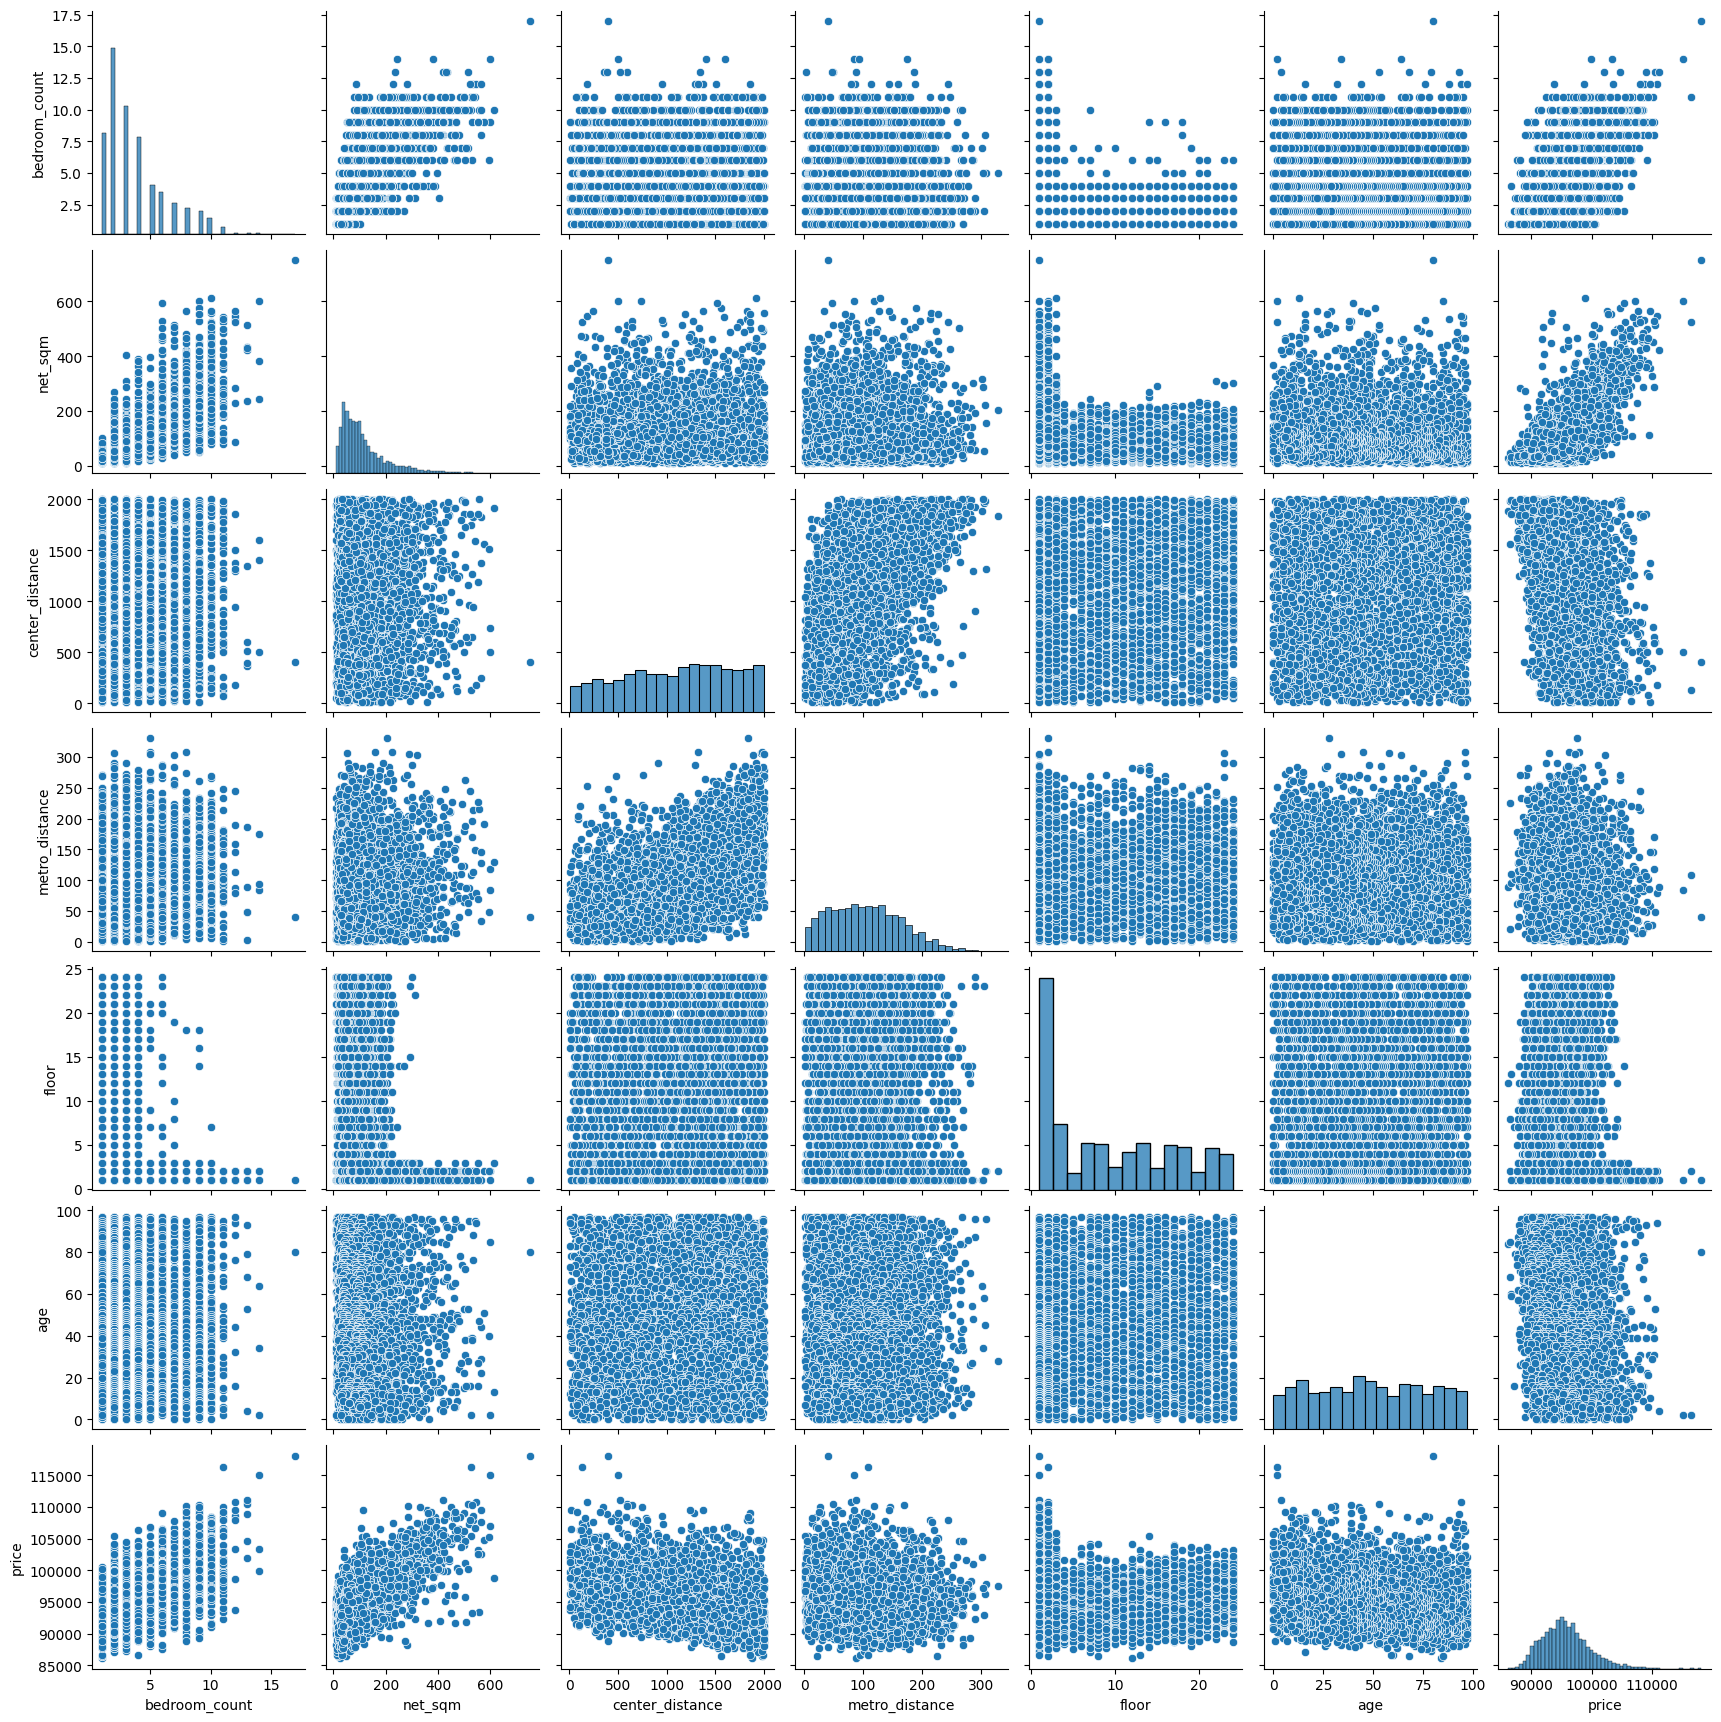

In [4]:
# just draw a head map to show us how the features of the houses correlate
sns.heatmap(data.corr())
# plot a pair plot in sns
sns.pairplot(data)


In [7]:
# extract the x and y values of the data
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 202.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4308 non-null   float64
dtypes: float64(1)
memory usage: 33.8 KB


In [8]:
# split our data in to the training and test data
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Train the regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [10]:
# make some Prediction in the model
y_pred = lin_model.predict(X_test)

# plot the predicted values with the test values
mean_abo_err = mean_absolute_error(y_test, y_pred)
print(mean_abo_err)

# mean error score
mean_error_score = np.sqrt(mean_absolute_error(y_test, y_pred))
print(mean_error_score)


# print the model score to predict the values
print(lin_model.score(X_test, y_test) * 100)


1383.8273766240736
37.1998303305818
77.00124685271041


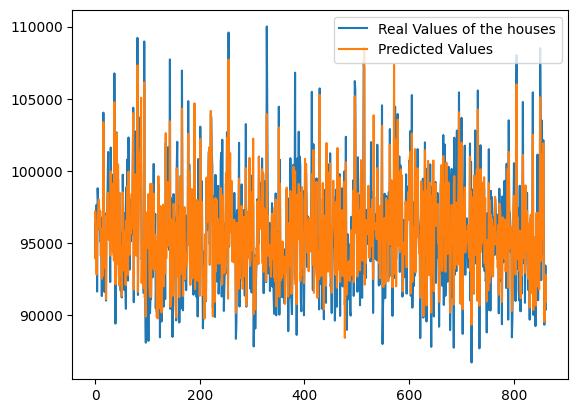

In [11]:
# the values of the y_test_values
y_test_price = y_test.values.flatten()

# plots
plt.plot(y_test_price, label='Real Values of the houses')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()

In [12]:
# import the needed files 

# to install the pickle you need to pip install pickle-mixin 
# this helps you prevent an error you might get just running pip install pickle 

import pickle as pk


In [13]:
#  using the pickle module to save this model in the current folder

# Saving model to pickle file
with open("./model/lin_model.pkl", "wb") as file: # file is a variable for storing the newly created file, it can be anything.
    pk.dump(lin_model, file) 
    

In [16]:
# nake a prediction for one house just
row_index = 20
single_row = X_test.iloc[[row_index]]
new_value = lin_model.predict(single_row)
print(single_row)

# first prediction of one house
print("another value", new_value)


# Alternatively, if you want to make a
another_value = lin_model.predict([[5, 40.8765, 1200.89, 29.093456, 3, 89]])

print("Price of the hosue:", f'{another_value[0][0]:.2f} dollars')



      bedroom_count     net_sqm  center_distance  metro_distance  floor  age
2218              4  193.696057           1880.4      106.161413     15   41
another value [[95868.939324]]
Price of the hosue: 91490.60 dollars


/home/it/ALU/summartive/Housing Price Prdiction/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
from typing import Annotated
from fastapi import FastAPI, Depends, HTTPException, status, Path
from pydantic import BaseModel, Field

app = FastAPI()

class HouseRequest(BaseModel):
    bedroom_count: int = Field(gt=0, lt=100)
    net_sqm: float = Field(gt=0, lt=10000)
    center_distance: float = Field(gt=0, lt=10000)
    metro_distance: float = Field(gt=0, lt=10000)
    floor: int = Field(gt=0, lt=500)
    age: int = Field(gt=0, lt=500)
    


@app.get("/", status_code=status.HTTP_200_OK)
async def get_hello():
    return {"hello": "world"}

@app.post('/predict', status_code=status.HTTP_200_OK)
async def make_prediction(house_request: HouseRequest):
    try:
        single_row = [[house_request.bedroom_count, house_request.net_sqm, house_request.center_distance, house_request.metro_distance, house_request.floor, house_request.age]]
        new_value = lin_model.predict(single_row)
        return {"predicted Price ": new_value[0][0]}
    except:
        raise HTTPException(status_code=500, detail="Something went wrong.")


In [18]:
#  introducing in 
%pip install fastapi nest-asyncio pyngrok uvicorn


Note: you may need to restart the kernel to use updated packages.


In [21]:
# get all the libs needed 
import nest_asyncio
from pyngrok import ngrok
import uvicorn


# function to make a tunnel to make sure that our code can be accessed outside 
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)


INFO:     Started server process [14955]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Public URL: https://96f7-105-179-6-14.ngrok-free.app
INFO:     105.179.6.14:0 - "GET / HTTP/1.1" 200 OK
INFO:     105.179.6.14:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     105.179.6.14:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     105.179.6.14:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     105.179.6.14:0 - "GET / HTTP/1.1" 200 OK


t=2024-04-04T15:31:55+0200 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=e76d48a0ef44 err="read tcp 100.115.92.196:44964->3.133.228.214:443: read: connection reset by peer"
t=2024-04-04T15:31:56+0200 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/tunnels/agents\r\n\r\nERR_NGROK_108\r\n"
t=2024-04-04T15:31:57+0200 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.c

KeyboardInterrupt: 

In [14]:


# if you want to run the models in the local host or locally on the same machine 
if __name__ == "__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    await server.serve()

INFO:     Started server process [7375]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:59676 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:58808 - "GET /class HTTP/1.1" 200 OK
INFO:     127.0.0.1:46600 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:46600 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:56670 - "POST /predict HTTP/1.1" 200 OK


/home/it/ALU/summartive/Housing Price Prdiction/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


INFO:     127.0.0.1:53280 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     127.0.0.1:52714 - "POST /predict HTTP/1.1" 200 OK


/home/it/ALU/summartive/Housing Price Prdiction/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [7375]
